In [39]:
'''
Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias. Se generó mediante un análisis de vgchartz.com.

Los campos incluyen:

Clasificación: Clasificación de ventas totales

Nombre: Nombre del juego

Plataforma: Plataforma de lanzamiento del juego (p. ej., PC, PS4, etc.)

Año: Año de lanzamiento del juego

Género: Género del juego

Editorial: Editorial del juego

Ventas NA: Ventas en Norteamérica (en millones)

Ventas UE: Ventas en Europa (en millones)

Ventas JP: Ventas en Japón (en millones)

Ventas Otras: Ventas en el resto del mundo (en millones)

Ventas Globales: Ventas totales a nivel mundial.
'''

'\nEste conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias. Se generó mediante un análisis de vgchartz.com.\n\nLos campos incluyen:\n\nClasificación: Clasificación de ventas totales\n\nNombre: Nombre del juego\n\nPlataforma: Plataforma de lanzamiento del juego (p. ej., PC, PS4, etc.)\n\nAño: Año de lanzamiento del juego\n\nGénero: Género del juego\n\nEditorial: Editorial del juego\n\nVentas NA: Ventas en Norteamérica (en millones)\n\nVentas UE: Ventas en Europa (en millones)\n\nVentas JP: Ventas en Japón (en millones)\n\nVentas Otras: Ventas en el resto del mundo (en millones)\n\nVentas Globales: Ventas totales a nivel mundial.\n'

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
datos = pd.read_csv('vgsales.csv')
datos.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
#VARIABLE OBJETIVO: Global_Sales (ventas totales en todo el mundo, se quiere ver qué hace que un juego venda mucho)

y = 'Global_Sales' 
x1 = 'NA_Sales'    
x2 = 'Year'         
x3 = 'Genre'       
datos_limpios = datos.copy()
datos_limpios = datos_limpios.dropna(subset=[y, x1, x2, x3]) 
# Elimina filas donde falten datos en Global_Sales, NA_Sales, Year o Genre (na= no disponible)(subset= columnas a revisar)
datos_limpios[x2] = datos_limpios[x2].astype(int) # Convierte Year a números enteros

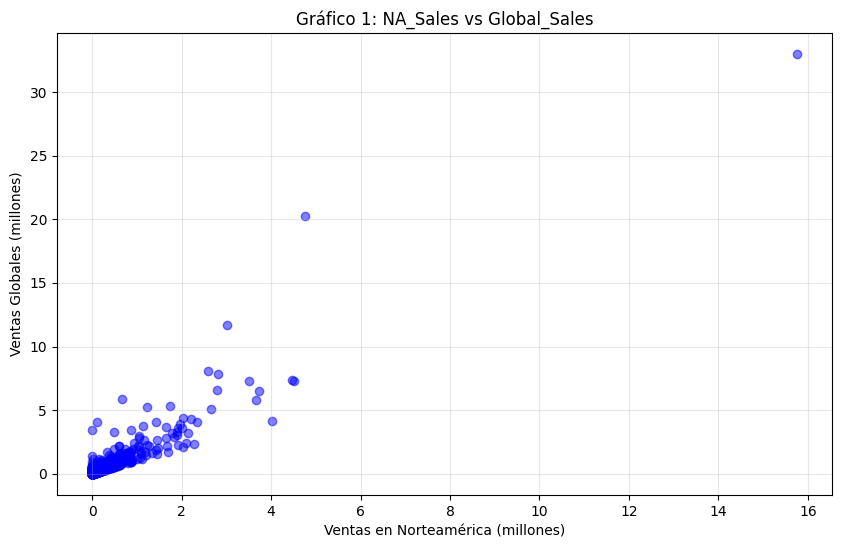

In [42]:
# NA_Sales vs Global_Sales
# Gráfico de dispersión:cuantas ventas globales tiene un juego según sus ventas en Norteamérica
plt.figure(figsize=(10, 6))
muestra = datos_limpios.sample(1000, random_state=42) #Muestra aleatoria de 1000 filas(random_state=42)

plt.scatter(muestra[x1], muestra[y], alpha=0.5, color='blue')
plt.xlabel('Ventas en Norteamérica (millones)')
plt.ylabel('Ventas Globales (millones)')
plt.title('Gráfico 1: NA_Sales vs Global_Sales')
plt.grid(True, alpha=0.3)
plt.show()

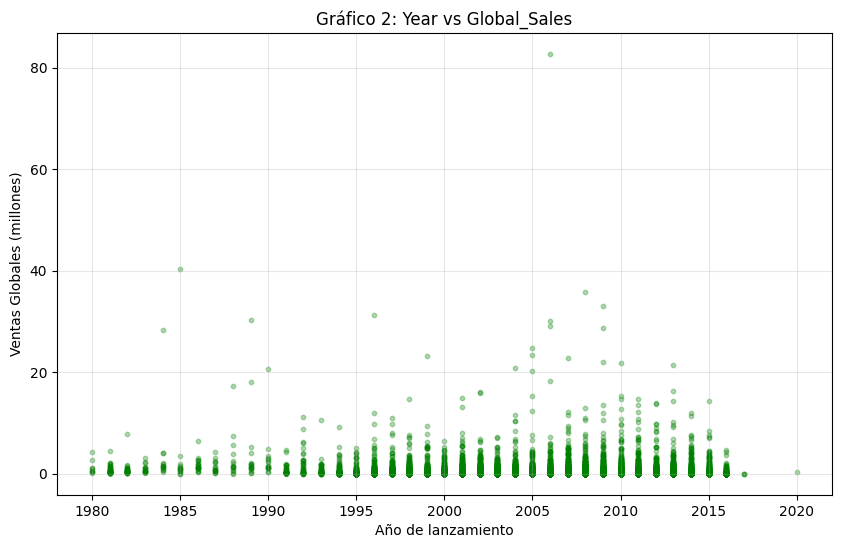

In [43]:
# Year vs Global_Sales 
# Gráfico de dispersión: cuántas ventas globales tiene un juego según su año de lanzamiento
plt.figure(figsize=(10, 6))
plt.scatter(datos_limpios[x2], datos_limpios[y], alpha=0.3, color='green', s=10)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Globales (millones)')
plt.title('Gráfico 2: Year vs Global_Sales')
plt.grid(True, alpha=0.3)

plt.show()

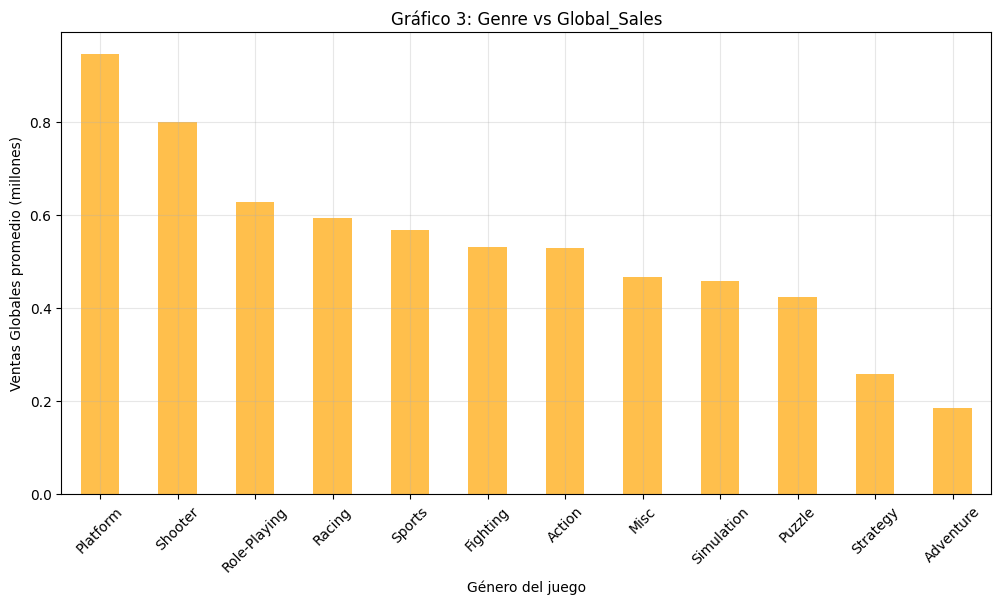

In [44]:
# Genre vs Global_Sales
# Gráfico de barras: promedio de ventas globales según el género del juego
plt.figure(figsize=(12, 6))

# Calcular promedio por género
promedio_genero = datos_limpios.groupby(x3)[y].mean().sort_values(ascending=False) 
# Agrupa por género y calcula el promedio de ventas globales(ascending=False= de mayor a menor)

# Hacer gráfico de barras
promedio_genero.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Género del juego')
plt.ylabel('Ventas Globales promedio (millones)')
plt.title('Gráfico 3: Genre vs Global_Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.show()

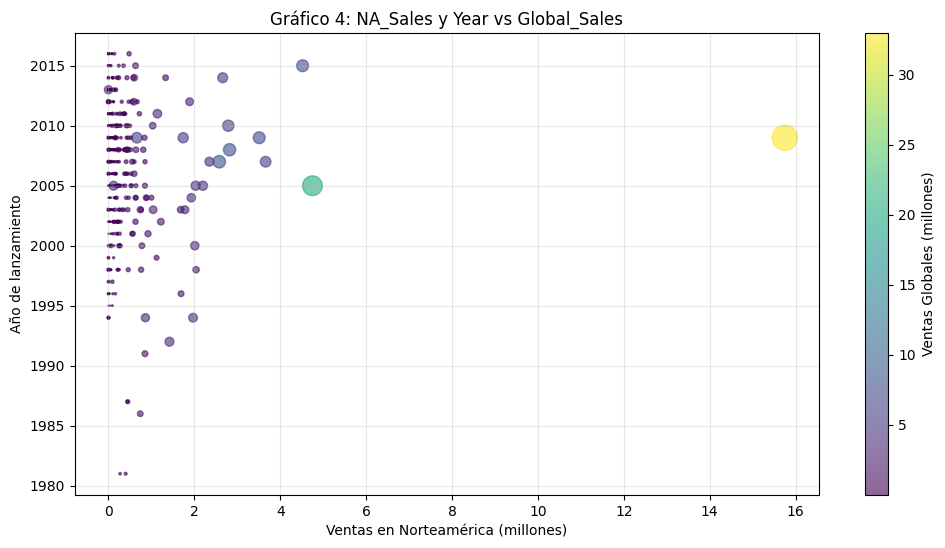

In [45]:
# NA_Sales y Year vs Global_Sales
# Gráfico de dispersión 3D: ventas globales según ventas en Norteamérica y año de lanzamiento
#se usa porque permite visualizar la relación entre tres variables en un solo gráfico.
# donde dos variables se representan en los ejes X e Y, y la tercera variable se representa mediante el color y el tamaño de los puntos.
plt.figure(figsize=(12, 6))

# Tomar una muestra más pequeña
muestra_3d = datos_limpios.sample(500, random_state=42)
#random_state=42 siempre salen los nmismos números aleatorios cada que se ejecuta
# Usar tamaño y color para mostrar la tercera dimensión
scatter = plt.scatter(
    muestra_3d[x1], 
    muestra_3d[x2], 
    c=muestra_3d[y], 
    s=muestra_3d[y]*10,  # Tamaño según ventas
    alpha=0.6,
    cmap='viridis'
)

plt.xlabel('Ventas en Norteamérica (millones)')
plt.ylabel('Año de lanzamiento')
plt.title('Gráfico 4: NA_Sales y Year vs Global_Sales')
plt.colorbar(scatter, label='Ventas Globales (millones)')
plt.grid(True, alpha=0.3)

plt.show()

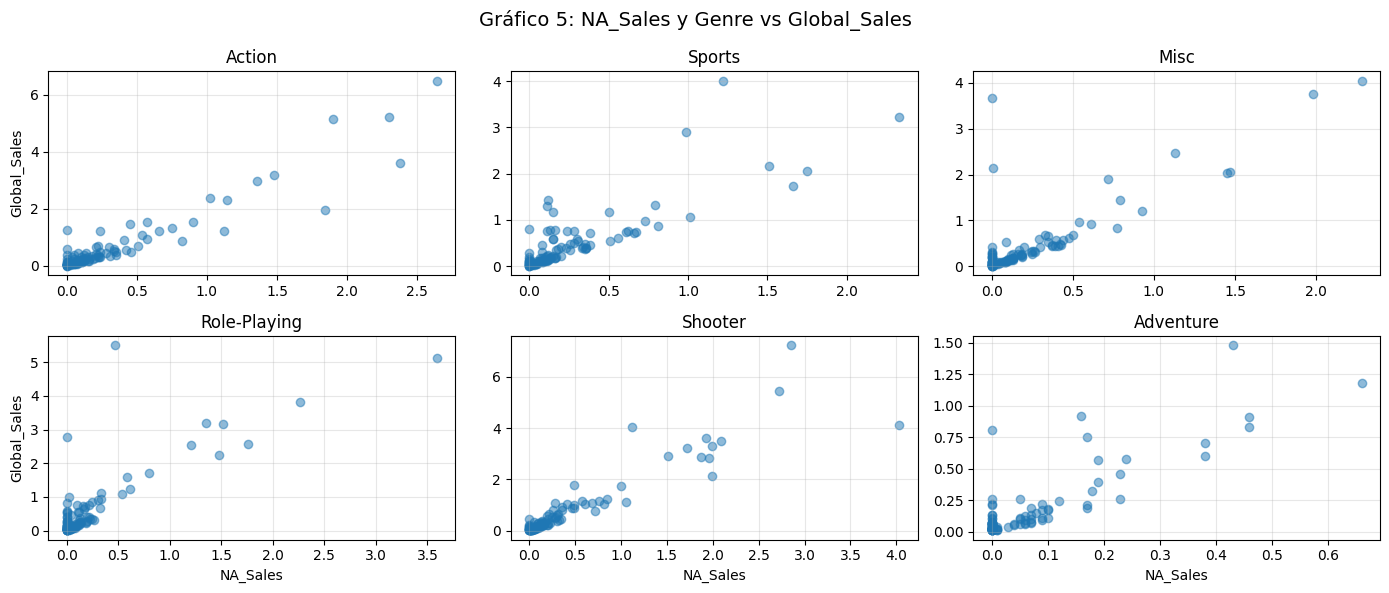

In [46]:

# NA_Sales y Genre vs Global_Sales
# Gráfico de dispersión: cuántas ventas globales tiene un juego según sus ventas en Norteamérica y su género
plt.figure(figsize=(14, 6))
generos_principales = datos_limpios[x3].value_counts().head(6).index
# Los 6 géneros con más juegos(value_counts= cuenta repeticiones, head(6)= primeros 6, index= obtener nombres)
datos_filtrados = datos_limpios[datos_limpios[x3].isin(generos_principales)]

# un gráfico por cada género
for i, genero in enumerate(generos_principales):
    plt.subplot(2, 3, i+1)
    datos_genero = datos_filtrados[datos_filtrados[x3] == genero].sample(100, random_state=42)
    
    plt.scatter(datos_genero[x1], datos_genero[y], alpha=0.5)
    plt.title(genero)
    plt.xlabel('NA_Sales' if i >= 3 else '')
    plt.ylabel('Global_Sales' if i % 3 == 0 else '')
    plt.grid(True, alpha=0.3)

plt.suptitle('Gráfico 5: NA_Sales y Genre vs Global_Sales', fontsize=14)
plt.tight_layout()
plt.show()

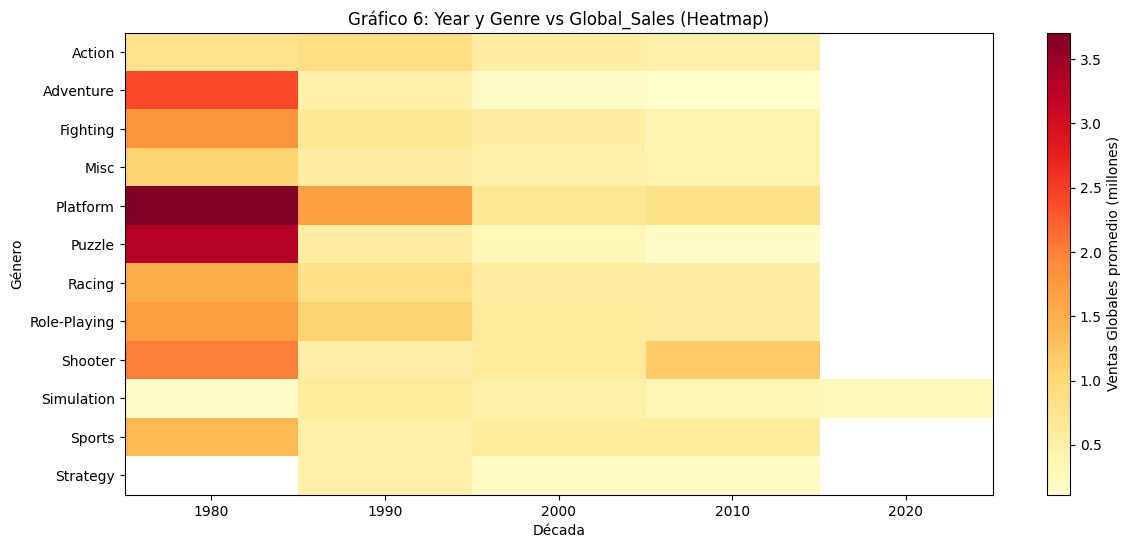

In [47]:
# Year y Genre vs Global_Sales
# Heatmap: promedio de ventas globales según el año y el género
plt.figure(figsize=(14, 6))

# Agrupar años en décadas para que sea más simple
datos_limpios['Decada'] = (datos_limpios[x2] // 10) * 10

# Crear tabla de promedios
# pivote_table: reordenar datos en forma de tabla
tabla_promedios = pd.pivot_table(
    datos_limpios,
    values=y,
    index='Decada',
    columns=x3,
    aggfunc='mean'
)

# Hacer heatmap
#el heatmap es una representación gráfica de datos donde los valores individuales contenidos en una matriz se representan como colores.
#se usa porque permite visualizar patrones y relaciones en grandes conjuntos de datos de manera sencilla.
plt.imshow(tabla_promedios.T, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Ventas Globales promedio (millones)')

#personalizar
plt.xlabel('Década')
plt.ylabel('Género')
plt.title('Gráfico 6: Year y Genre vs Global_Sales (Heatmap)')
plt.yticks(range(len(tabla_promedios.columns)), tabla_promedios.columns)
plt.xticks(range(len(tabla_promedios.index)), tabla_promedios.index)

plt.show()

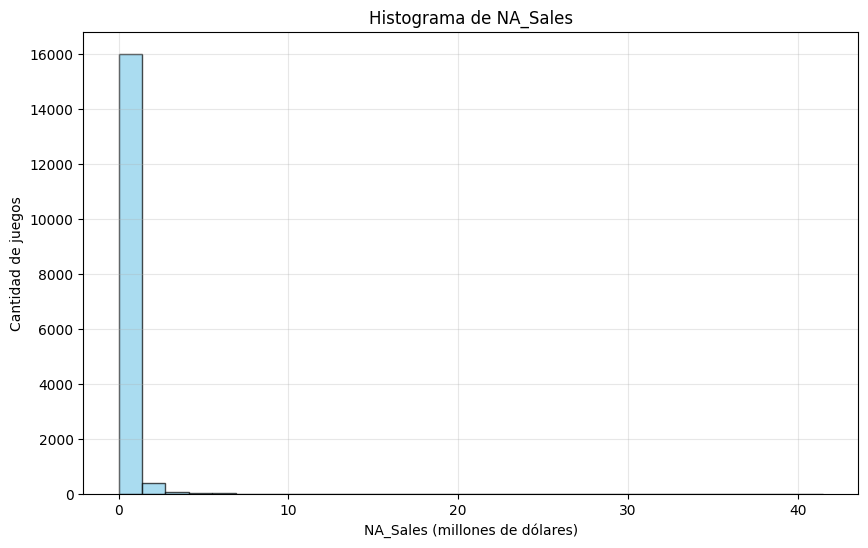

'\n   - Muy sesgada a la derecha (asimétrica) \n   - La mayoría de juegos vende poco \n   - Pocos juegos venden MUCHO\n'

In [48]:
#Histograma de una X's
x_variable = 'NA_Sales'
datos_limpios = datos.dropna(subset=[x_variable]).copy() # Elimina filas donde falten datos en NA_Sales (subset= columnas a revisar)
# Personalizar
plt.figure(figsize=(10, 6))
plt.hist(datos_limpios[x_variable], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel(f'{x_variable} (millones de dólares)')
plt.ylabel('Cantidad de juegos')
plt.title(f'Histograma de {x_variable}')
plt.grid(True, alpha=0.3)
plt.show()

"""
   - Muy sesgada a la derecha (asimétrica) 
   - La mayoría de juegos vende poco 
   - Pocos juegos venden MUCHO
"""

In [49]:
#obtener medidas de tendencia central y dispersión de todas las variables:
variables_numericas = []

for col in datos.columns:
    if datos[col].dtype in ['int64', 'float64']: #comprueba si la columna es numérica con dtype para cada columna
        variables_numericas.append(col)

for var in variables_numericas:
    print(f"\n{var}:")
    print("-" * 40)
    # quitar valores NaN para cálculos
    datos_limpios = datos[var].dropna()
    
    if len(datos_limpios) > 0: 
        # calcula medidas
        media = datos_limpios.mean()
        mediana = datos_limpios.median()
        moda = datos_limpios.mode()
        varianza = datos_limpios.var()
        desviacion = datos_limpios.std()

        print(f"Media: {media:.4f}")
        print(f"Mediana: {mediana:.4f}")
        print(f"Moda: {moda.iloc[0] if len(moda) > 0 else 'N/A'}")
        print(f"Varianza: {varianza:.4f}")
        print(f"Desviación estándar: {desviacion:.4f}")
        print(f"Rango: [{datos_limpios.min():.4f}, {datos_limpios.max():.4f}]")
    else:
        print("No hay datos válidos para calcular")




Rank:
----------------------------------------
Media: 8300.6053
Mediana: 8300.5000
Moda: 1
Varianza: 22961864.1142
Desviación estándar: 4791.8539
Rango: [1.0000, 16600.0000]

Year:
----------------------------------------
Media: 2006.4064
Mediana: 2007.0000
Moda: 2009.0
Varianza: 33.9770
Desviación estándar: 5.8290
Rango: [1980.0000, 2020.0000]

NA_Sales:
----------------------------------------
Media: 0.2647
Mediana: 0.0800
Moda: 0.0
Varianza: 0.6670
Desviación estándar: 0.8167
Rango: [0.0000, 41.4900]

EU_Sales:
----------------------------------------
Media: 0.1467
Mediana: 0.0200
Moda: 0.0
Varianza: 0.2554
Desviación estándar: 0.5054
Rango: [0.0000, 29.0200]

JP_Sales:
----------------------------------------
Media: 0.0778
Mediana: 0.0000
Moda: 0.0
Varianza: 0.0957
Desviación estándar: 0.3093
Rango: [0.0000, 10.2200]

Other_Sales:
----------------------------------------
Media: 0.0481
Mediana: 0.0100
Moda: 0.0
Varianza: 0.0356
Desviación estándar: 0.1886
Rango: [0.0000, 10.5700]



In [50]:
# ANÁLISIS DE OUTLIERS EN EL DATASET AUSPICIADO POR DICK SICK
"""
AAAAAAAAAAAAAAAAAAA BORRAR ESTA CELDA, ES SOLO PARA EL  WORD PUTO PUTO PUTO PUTO PUTO PUTO, ASI ME ASEGURO QUE LA BORREN JAJA
ESCRIBANLO CON SUS PALABRAS NO MAMEN XD
"""

"""
OUTLIERS IDENTIFICADOS:

1. SUPERVENTAS EXTREMAS:
   - Wii Sports (82.74M) - Valor ATÍPICO
   - Super Mario Bros. (40.24M) - Muy alto
   - Mario Kart Wii (35.82M) - Extremo
   
2. PLATAFORMAS OBSOLETAS:
   - Juegos de Atari 2600 en dataset moderno
   - NES games con ventas muy antiguas

3. AÑOS ANÓMALOS:
   - Juegos de 1980 vs 2020
   - Diferente mercado, inflación, población

4. REGIONES DESBALANCEADAS:
   - Duck Hunt: 26.93M NA vs 0.63M EU (42x más)
   - Tetris GB: 23.2M NA vs 2.26M EU (10x más)

5. GÉNEROS CON VALORES EXTREMOS:
   - Sports: Wii Sports distorsiona promedio
   - Misc: Wii Play (29M) vs otros <5M

¿SE PUEDEN APROVECHAR?

SÍ se pueden aprovechar:
✅ Como casos de estudio de "éxito masivo"
✅ Para análisis separado: "juegos hit" vs "normales"
✅ Identificar patrones de superventas
✅ Entender el mercado de "blockbusters"

NO se pueden aprovechar así:
❌ Para promedios generales (distorsionan)
❌ En modelos predictivos sin tratamiento
❌ En gráficos con escala lineal (se amontonan)
❌ Para medir "juego promedio"

TRATAMIENTO RECOMENDADO:
1. Separar análisis: Grupo A (normales) vs Grupo B (superventas)
2. Usar escala logarítmica en gráficos
3. Usar mediana, no media
4. Considerar ventas per cápita o ajustadas por inflación
5. Winsorizing: limitar valores extremos
"""

'\nOUTLIERS IDENTIFICADOS:\n\n1. SUPERVENTAS EXTREMAS:\n   - Wii Sports (82.74M) - Valor ATÍPICO\n   - Super Mario Bros. (40.24M) - Muy alto\n   - Mario Kart Wii (35.82M) - Extremo\n\n2. PLATAFORMAS OBSOLETAS:\n   - Juegos de Atari 2600 en dataset moderno\n   - NES games con ventas muy antiguas\n\n3. AÑOS ANÓMALOS:\n   - Juegos de 1980 vs 2020\n   - Diferente mercado, inflación, población\n\n4. REGIONES DESBALANCEADAS:\n   - Duck Hunt: 26.93M NA vs 0.63M EU (42x más)\n   - Tetris GB: 23.2M NA vs 2.26M EU (10x más)\n\n5. GÉNEROS CON VALORES EXTREMOS:\n   - Sports: Wii Sports distorsiona promedio\n   - Misc: Wii Play (29M) vs otros <5M\n\n¿SE PUEDEN APROVECHAR?\n\nSÍ se pueden aprovechar:\n✅ Como casos de estudio de "éxito masivo"\n✅ Para análisis separado: "juegos hit" vs "normales"\n✅ Identificar patrones de superventas\n✅ Entender el mercado de "blockbusters"\n\nNO se pueden aprovechar así:\n❌ Para promedios generales (distorsionan)\n❌ En modelos predictivos sin tratamiento\n❌ En gráf

In [51]:
#limpieza de datos faltantes

print("Datos faltantes:")
for col in datos.columns:
    faltan = datos[col].isna().sum()
    print(f"{col}: {faltan}")

año_comun = datos['Year'].mode()[0]
datos['Year'] = datos['Year'].fillna(año_comun)

#rellena los datos faltantes de columnas de numeros con 0
columnas_ventas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in columnas_ventas:
    datos[col] = datos[col].fillna(0)

#rellena los datos faltantes de texto con 'Desconocido'
columnas_texto = ['Name', 'Platform', 'Genre', 'Publisher']
for col in columnas_texto:
    datos[col] = datos[col].fillna('Desconocido')

'''
las columnas de datos numericos y las de texto se rellenaron diferente según el tipo de dato a lo hecho anteriormente en el punto de las medidas de tendencia central y dispersión 
porque se corrigio manualmente el año y rompia un poco el algoritmo de separacion.
'''

print(f"\nTotal faltantes después: {datos.isna().sum().sum()}")


Datos faltantes:
Rank: 0
Name: 0
Platform: 0
Year: 271
Genre: 0
Publisher: 58
NA_Sales: 0
EU_Sales: 0
JP_Sales: 0
Other_Sales: 0
Global_Sales: 0

Total faltantes después: 0


In [ ]:
!pip install statsmodels 
'''
Es una librería de Python para hacer estadísticas más avanzadas que las básicas.
-datos normales
-relacion entre datos
-significancia de datos
'''

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import statsmodels.api as sm
import math

# variable objetivo
y = 'Global_Sales'
y_datos = datos[y]

print("ANÁLISIS CON STATSMODELS")
print("=" * 40)

# Probamos con cada variable
variables = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


for x in variables:  # Recorre cada variable X
    x_datos = datos[[x]]  # Toma datos de la variable X
    x_con_constante = sm.add_constant(x_datos)  # Añade columna de 1's porque el modelo lo necesita para predecir.
    modelo = sm.OLS(y_datos, x_con_constante)  # Crea modelo de regresión lineal
    resultados = modelo.fit()  # Calcula el modelo con los datos
    r_cuadrado = resultados.rsquared  # Obtiene el R² del modelo
    r = math.sqrt(r_cuadrado)

    print(f"\n{x}:")
    print(f"R² = {r_cuadrado*100:.1f}%")
    print(f"r = {r:.4f}")



"""
CONCLUSIÓN DEL ANÁLISIS:

1. NA_Sales es la MEJOR variable predictora
   - Explica ~95% de Global_Sales
   - Si un juego vende bien en NA, vende bien globalmente

2. EU_Sales también es buena predictora  
   - Explica ~72% de Global_Sales
   - Europa es el segundo mercado más importante

3. JP_Sales y Other_Sales son regulares
   - Japón: solo explica ~22% (mercado diferente)
   - Otras regiones: explica ~53% (varias regiones juntas)

IMPLICACIÓN: Para predecir ventas globales, 
enfocarse principalmente en NA_Sales.
"""
"""
DIFERENCIA ENTRE R² Y CORRELACIÓN DE PEARSON:

Pearson (r): Mide FUERZA y DIRECCIÓN de relación lineal
- Rango: -1 a 1
- Ejemplo: r = 0.9 (muy fuerte positiva)

R² (R-cuadrado): Mide PORCENTAJE explicado por el modelo  
- Rango: 0 a 1 (0% a 100%)
- En regresión simple: R² = r²
- Ejemplo: r = 0.9 → R² = 0.81 → 81% explicado

RELACIÓN: R² es el cuadrado de Pearson
"""

ANÁLISIS CON STATSMODELS

NA_Sales:
R² = 88.6%
r = 0.9410

EU_Sales:
R² = 81.5%
r = 0.9028

JP_Sales:
R² = 37.4%
r = 0.6118

Other_Sales:
R² = 56.0%
r = 0.7483


'\nDIFERENCIA ENTRE R² Y CORRELACIÓN DE PEARSON:\n\nPearson (r): Mide FUERZA y DIRECCIÓN de relación lineal\n- Rango: -1 a 1\n- Ejemplo: r = 0.9 (muy fuerte positiva)\n\nR² (R-cuadrado): Mide PORCENTAJE explicado por el modelo  \n- Rango: 0 a 1 (0% a 100%)\n- En regresión simple: R² = r²\n- Ejemplo: r = 0.9 → R² = 0.81 → 81% explicado\n\nRELACIÓN: R² es el cuadrado de Pearson\n'